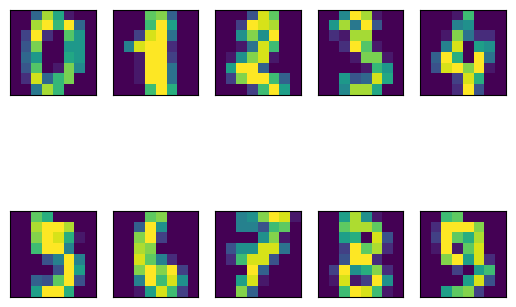

In [2]:
# apply PCA and TSNE to digit data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
fig, axs = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()})
for axs, img in zip(axs.ravel(), digits.images):
    axs.imshow(img)

In [4]:
digits.data.shape

(1797, 64)

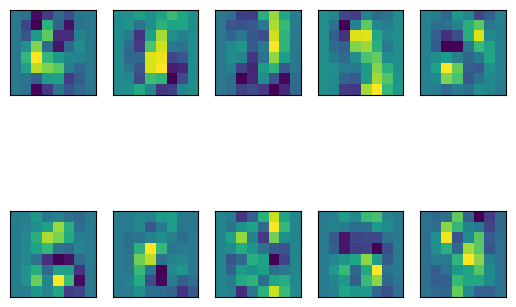

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(digits.data)

# princial components are stored in pca.components_
fig, axs = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()})
for axs, img in zip(axs.ravel(), pca.components_.reshape(-1,8,8)):
    axs.imshow(img)

0.8943031165985262


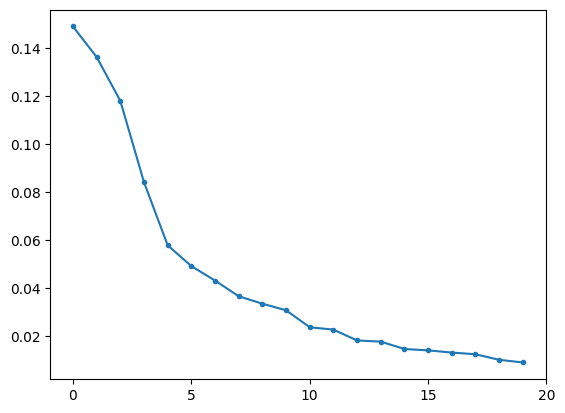

In [12]:
# variance explained by the components is stored in pca.explained_variance_
# and its ratio is in pca.explained_variance_ratio
import numpy as np
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_,'.-')
plt.xticks(range(0,21,5))
plt.show()

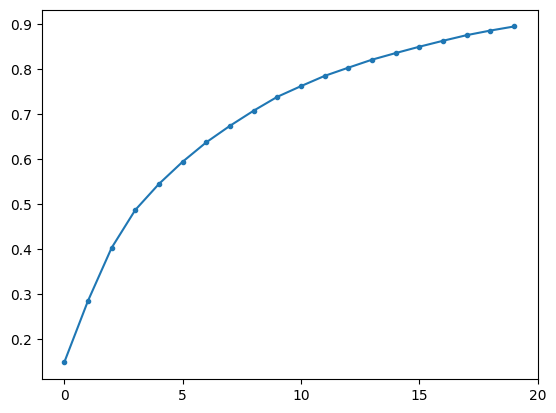

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xticks(range(0,21,5))
plt.show()

Text(0, 0.5, '2nd PC')

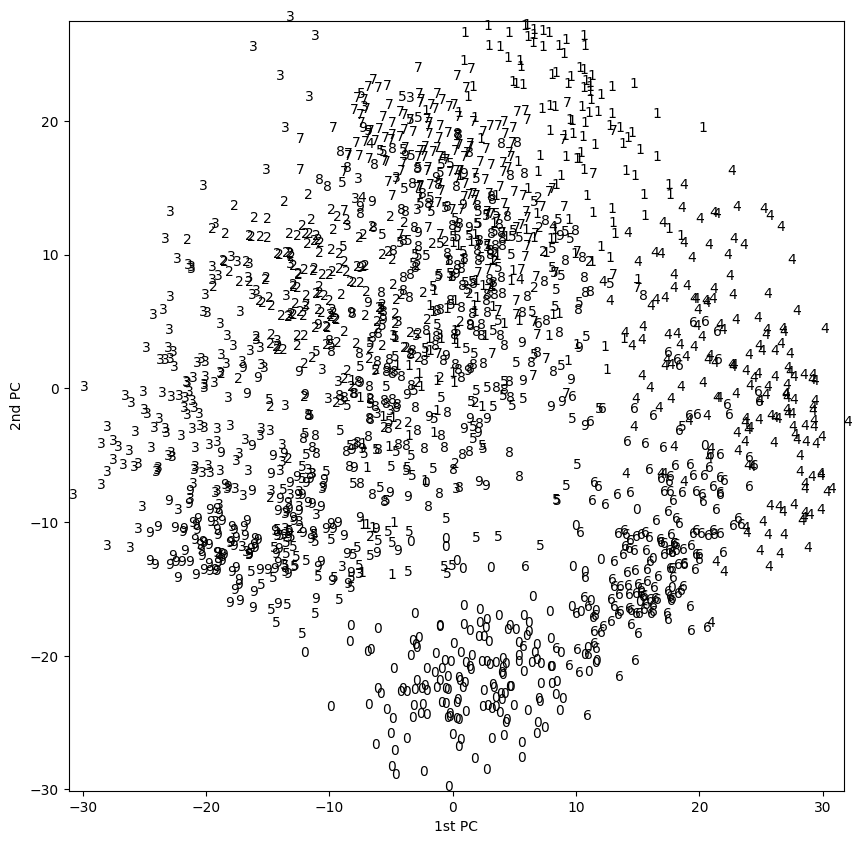

In [26]:
# fix the number of components
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

# plot with numbers
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]))
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

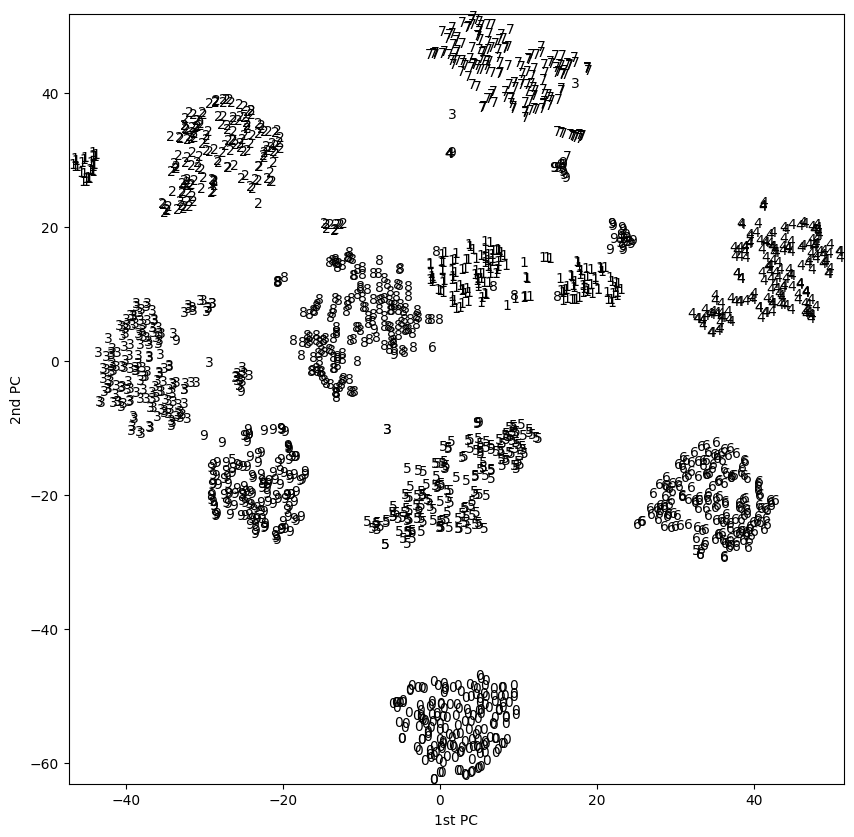

In [28]:
# apply TSNE to the data
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

# plot with numbers
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]))
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()